    # Multiple linear regression is a statistical technique that models the relationship between a dependent variable and two or more independent variables. It's used when more than one independent variable is assumed to have an impact on the dependent variable.

    # Multiple linear regression uses a straight line to estimate the relationship between a quantitative dependent variable and two or more independent variables. The dependent variable is expressed as a linear combination of all independent variables.

    Multiple linear regression models must satisfy five main assumptions:
    Linearity
    Homoskedasticity
    Independence of errors
    Normality
    Independence of independent variables

        Diagnostic plots can help detect whether these assumptions are satisfied. 

In [264]:
import numpy as np
import pandas as pd

In [265]:
data = pd.read_csv('ToyotaCorolla.csv',encoding = 'utf-8', usecols=["Age_08_04","cc","Doors","Gears","HP","KM","Quarterly_Tax","Weight","Price"])

In [266]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [268]:
df = data.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [269]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [270]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [271]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [272]:
# Calculate the correlation matrix
tc = df.copy()
corr_matrix = tc.corr()
corr_matrix

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


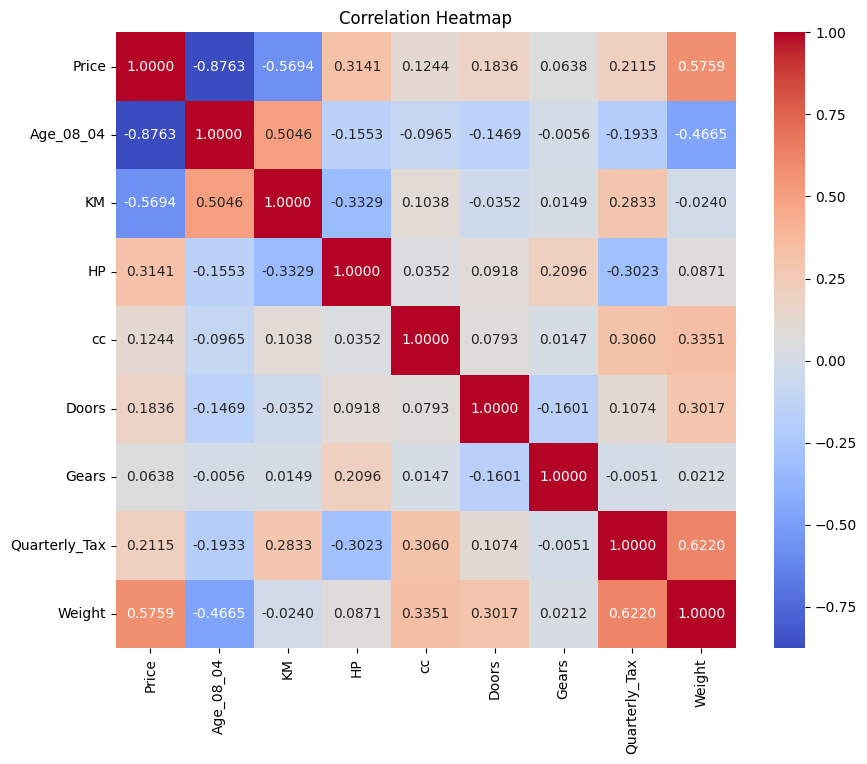

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".4f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

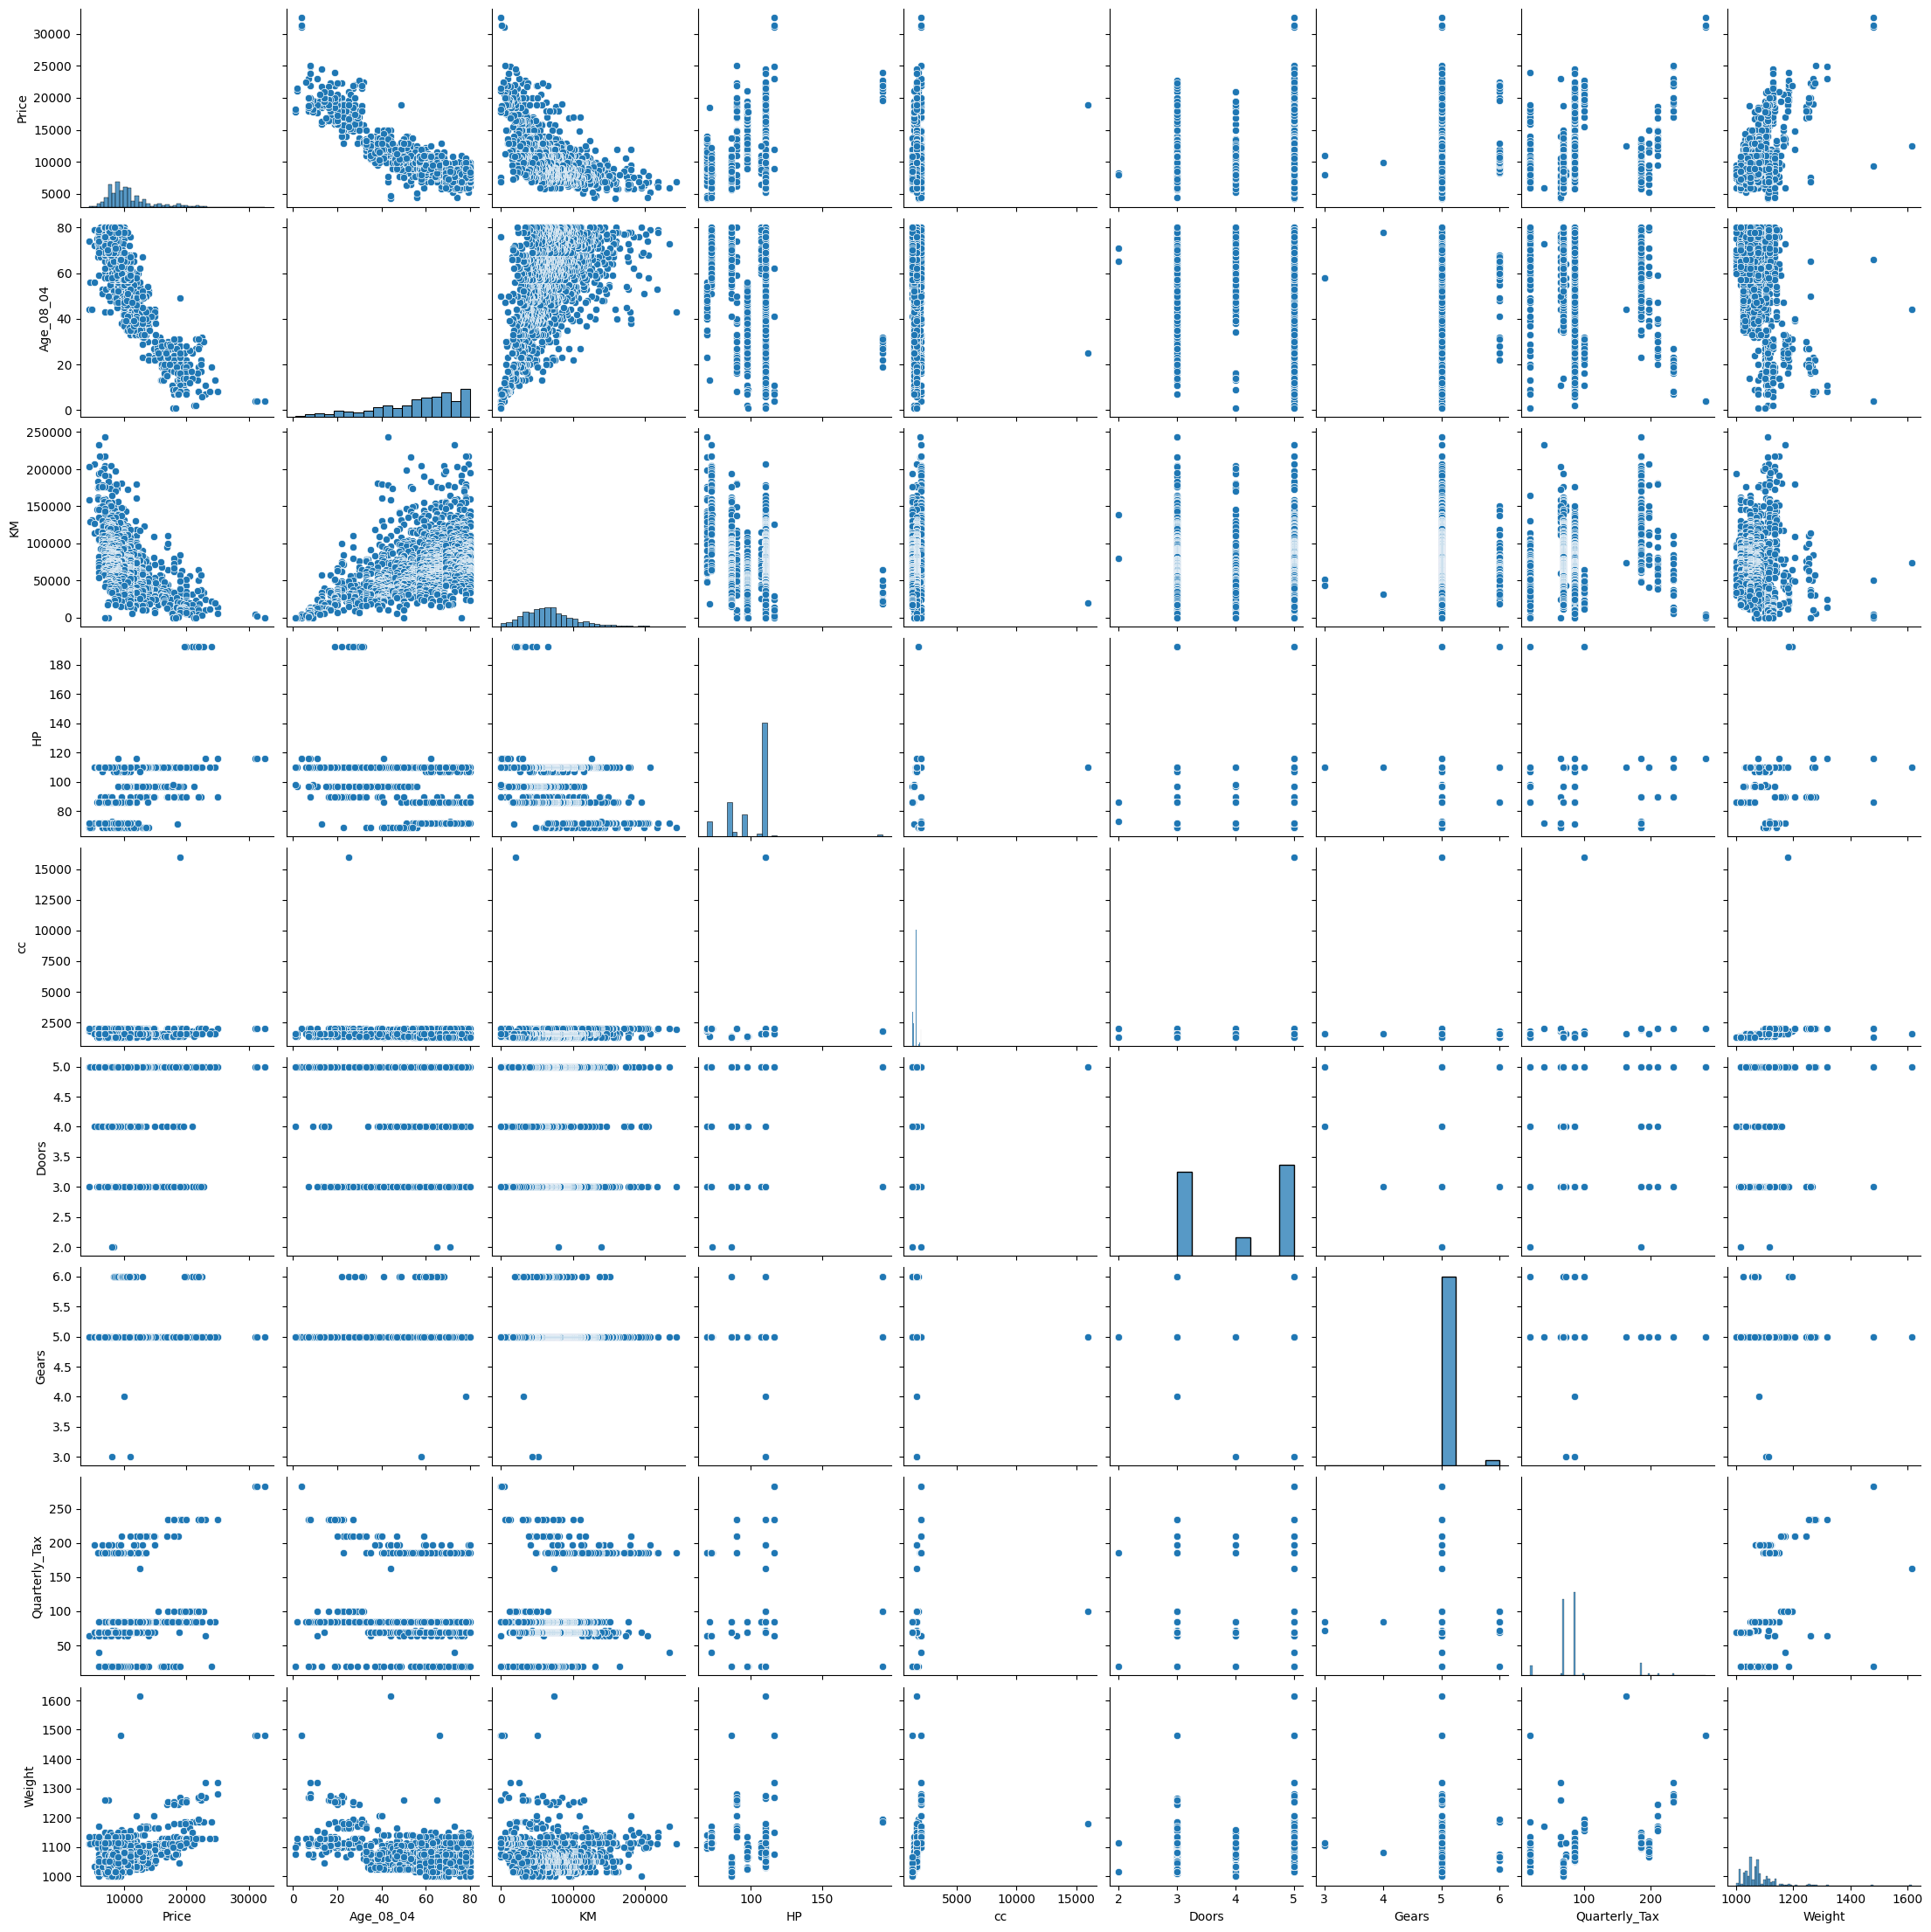

In [274]:
sns.pairplot(tc)

In [275]:
import statsmodels.formula.api as smf

model = smf.ols('Price~Age_08_04+cc+Doors+Gears+HP+KM+Quarterly_Tax+Weight', data = tc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:26:29   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875

In [276]:
# Initialize empty lists to store values
predictors = []
p_values = []
t_values = []
rsquared_values = []
adj_rsquared_values = []

# Iterate through each predictor and fit a linear regression model
for col in X.columns:
    # Define the regression formula
    formula = f"Price ~ {col}"
    
    # Fit the linear regression model
    model_eip = smf.ols(formula=formula, data=tc).fit()

    # Print model summary
    print(f"Predictor: {col}")
    print(model_eip.summary())
    print("\n")

    # Store predictor name
    predictors.append(col)

    # Extract p-value and t-value
    p_values.append(model_eip.pvalues[col])
    t_values.append(model_eip.tvalues[col])

    # Extract R-squared and adjusted R-squared
    rsquared_values.append(model_eip.rsquared)
    adj_rsquared_values.append(model_eip.rsquared_adj)

# Create a DataFrame
result_df = pd.DataFrame({
    'Predictor': predictors,
    'R-squared': rsquared_values,
    'Adj R-squared': adj_rsquared_values,
    'P-value': p_values,
    'T-value': t_values
})

print(result_df)

Predictor: Age_08_04
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4740.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:26:29   Log-Likelihood:                -12742.
No. Observations:                1435   AIC:                         2.549e+04
Df Residuals:                    1433   BIC:                         2.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.026e+04    145.92

In [277]:
model_cc_Doors = smf.ols('Price~cc+Doors', data=tc).fit()
model_cc_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           2.55e-15
Time:                        21:26:30   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [278]:
# Initialize an empty list to store VIF values
vif_values = []

# Iterate over each predictor variable
for variable in X.columns:
    # Fit a linear regression model and calculate R-squared
    rsquared = smf.ols(f'{variable} ~ ' + '+'.join([var for var in X.columns if var != variable]), data=tc).fit().rsquared
    # Calculate VIF
    vif = 1 / (1 - rsquared)
    # Append VIF value to the list
    vif_values.append(vif)

# Create a DataFrame to display the results
vif_df = pd.DataFrame({'Variables': X.columns, 'VIF': vif_values})
print(vif_df)


       Variables       VIF
0      Age_08_04  1.876236
1             KM  1.757178
2             HP  1.419180
3             cc  1.163470
4          Doors  1.155890
5          Gears  1.098843
6  Quarterly_Tax  2.295375
7         Weight  2.487180


In [279]:
# Residual Analysis

## Test for Normality of Residuals (Q-Q plot)

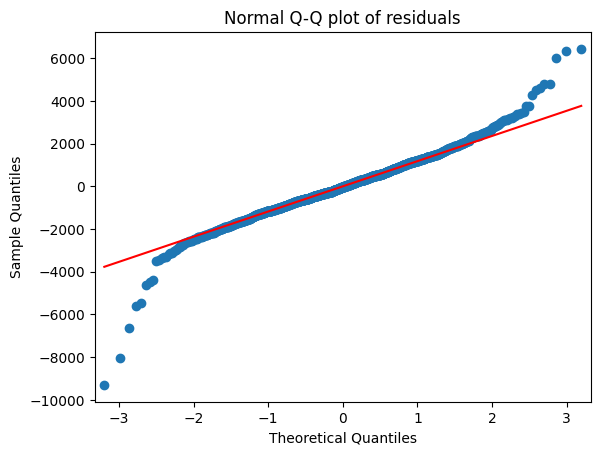

In [280]:
import statsmodels.api as sm

# Generate QQ plot of residuals
qqplot = sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [281]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  117,  118,  119,  120,  122,  124,  125,  126,
         127,  133,  135,  137,  138,  140,  141,  142,  143,  145,  146,
         147,  148,  149,  150,  151,  152,  153,  155,  156,  157,  158,
         159,  160,  161,  162,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  189,  193,  195,  196,  200,  203,  204,  209,  210,  215,
         222,  229,  231,  232,  236, 

In [282]:
# Residual plot for homoscedasticity

In [283]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

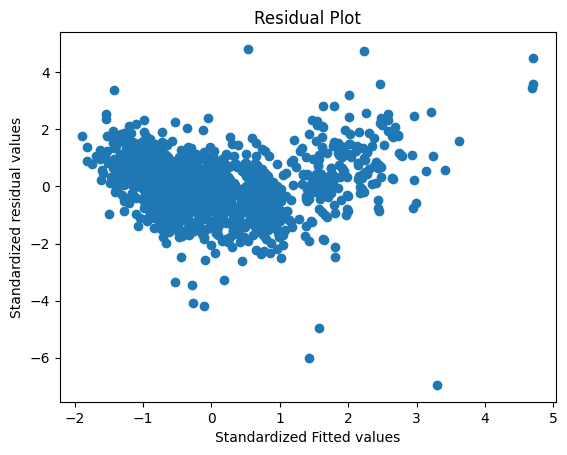

In [284]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

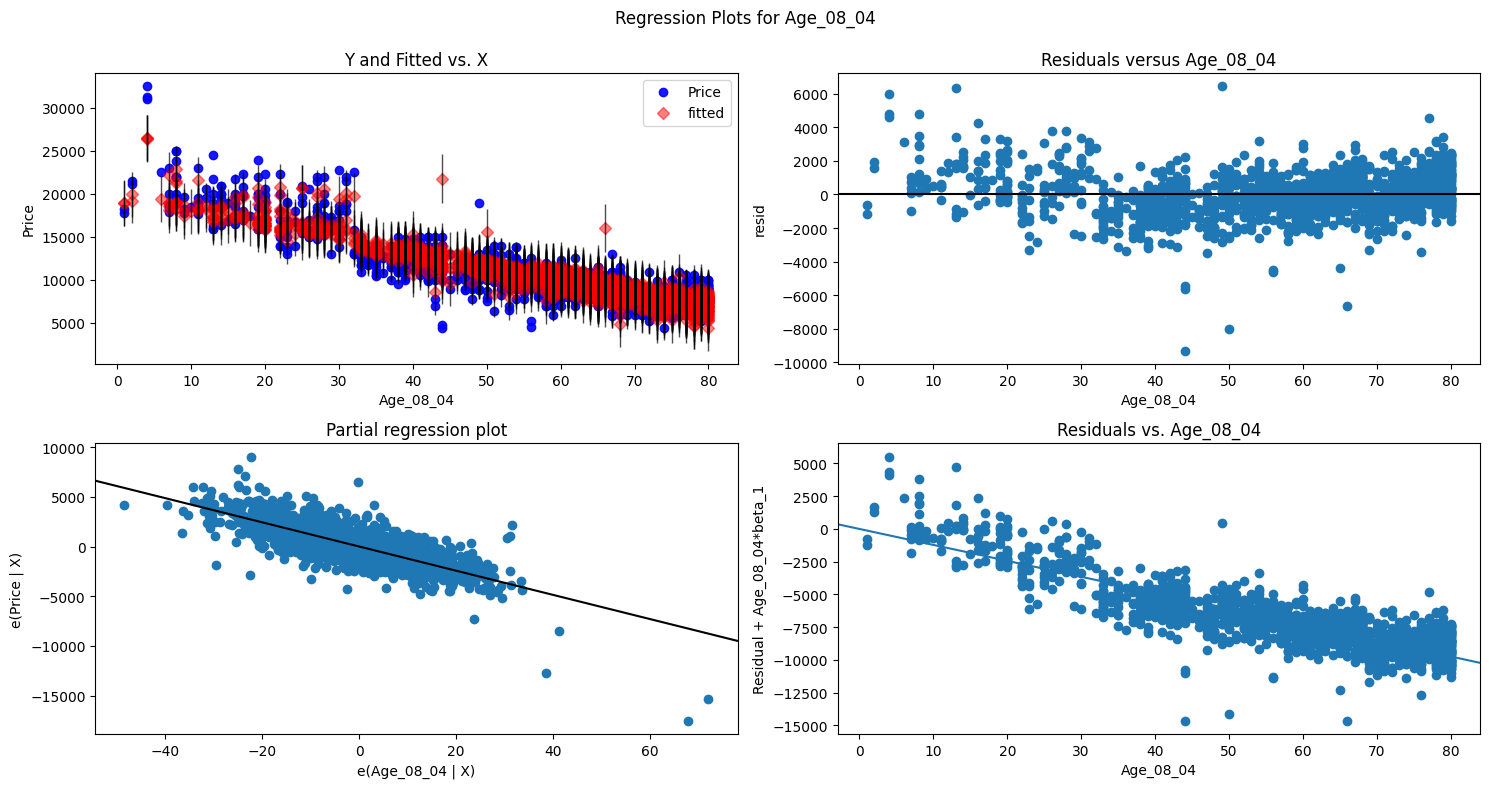

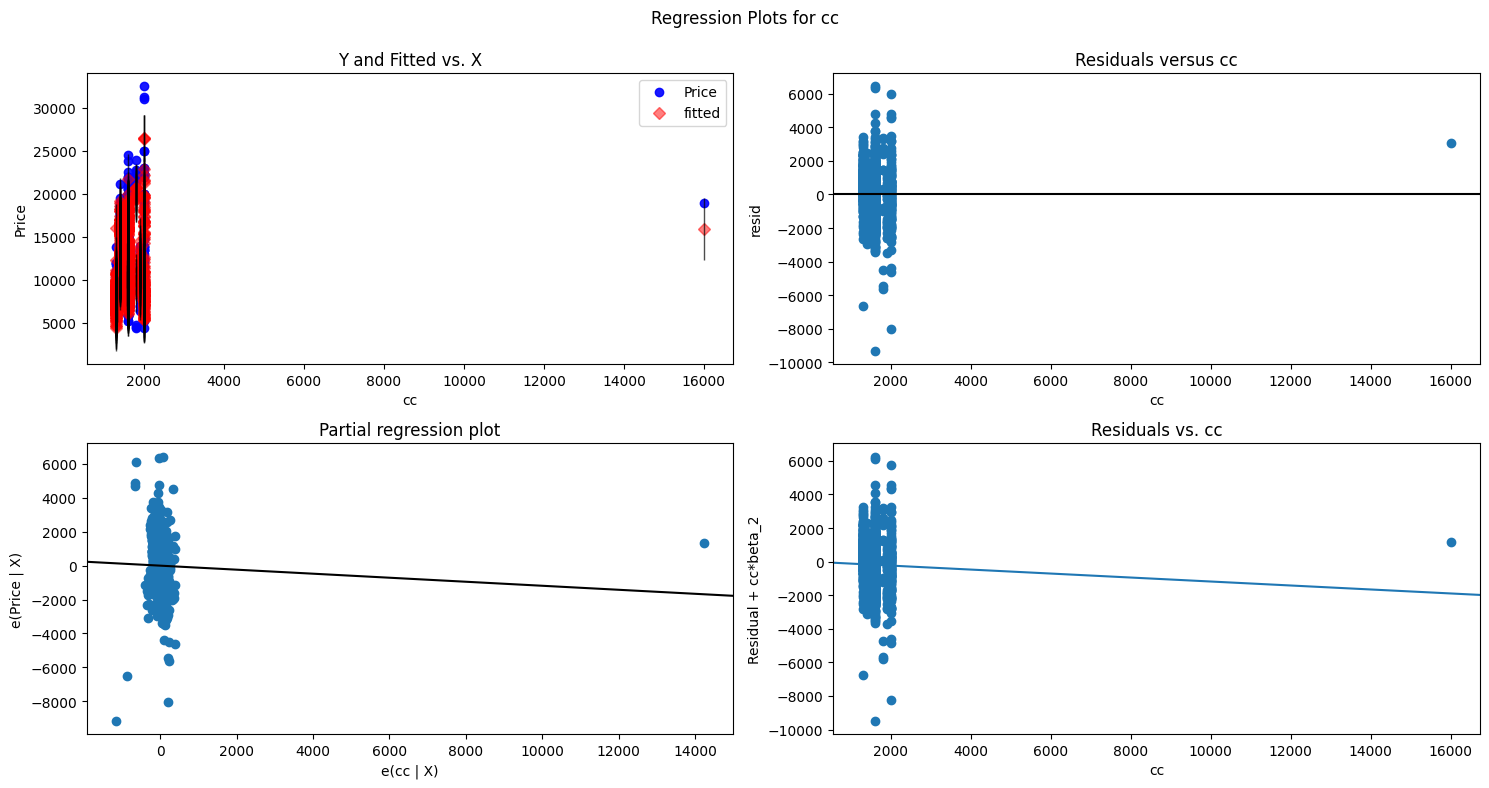

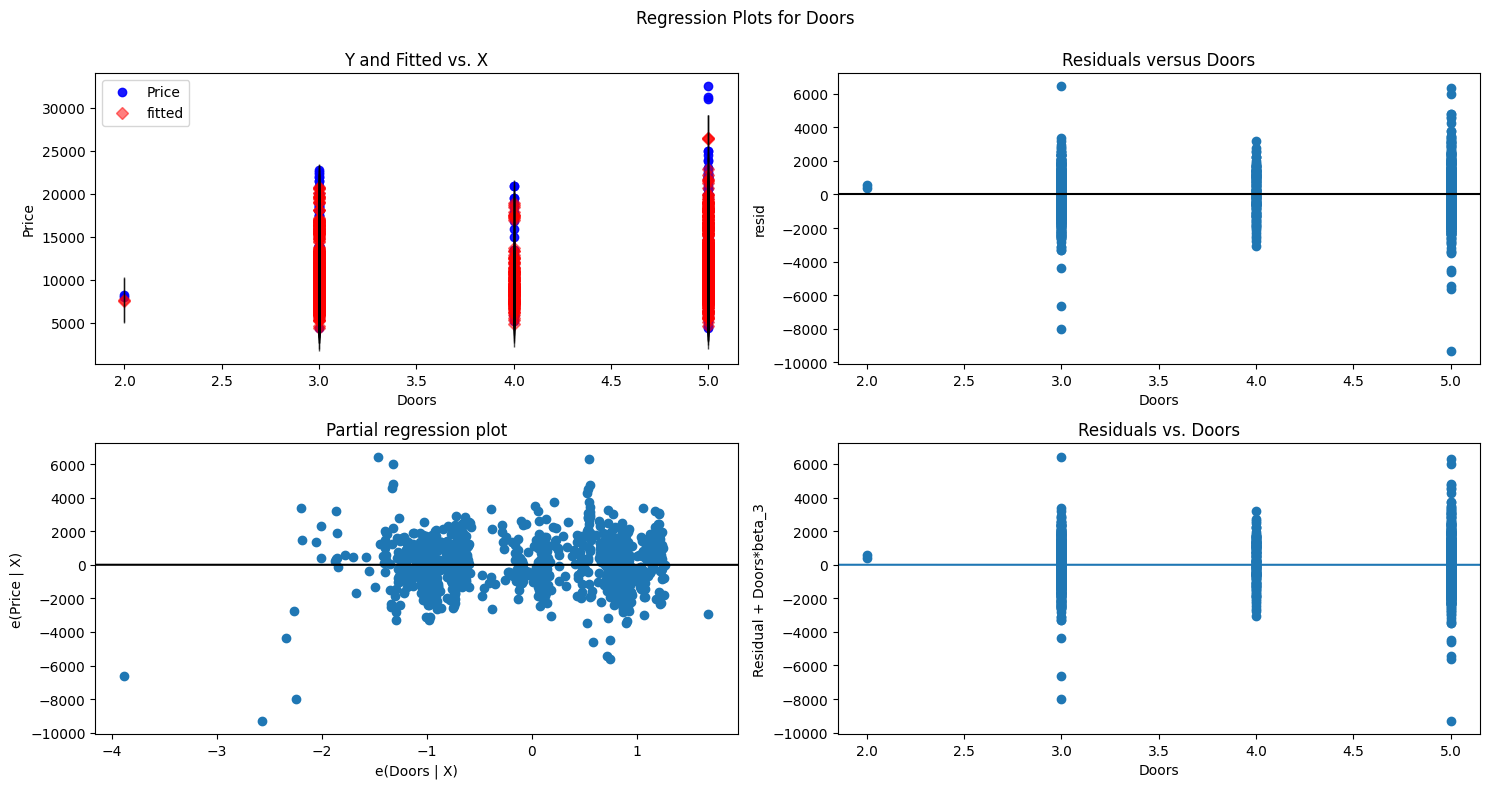

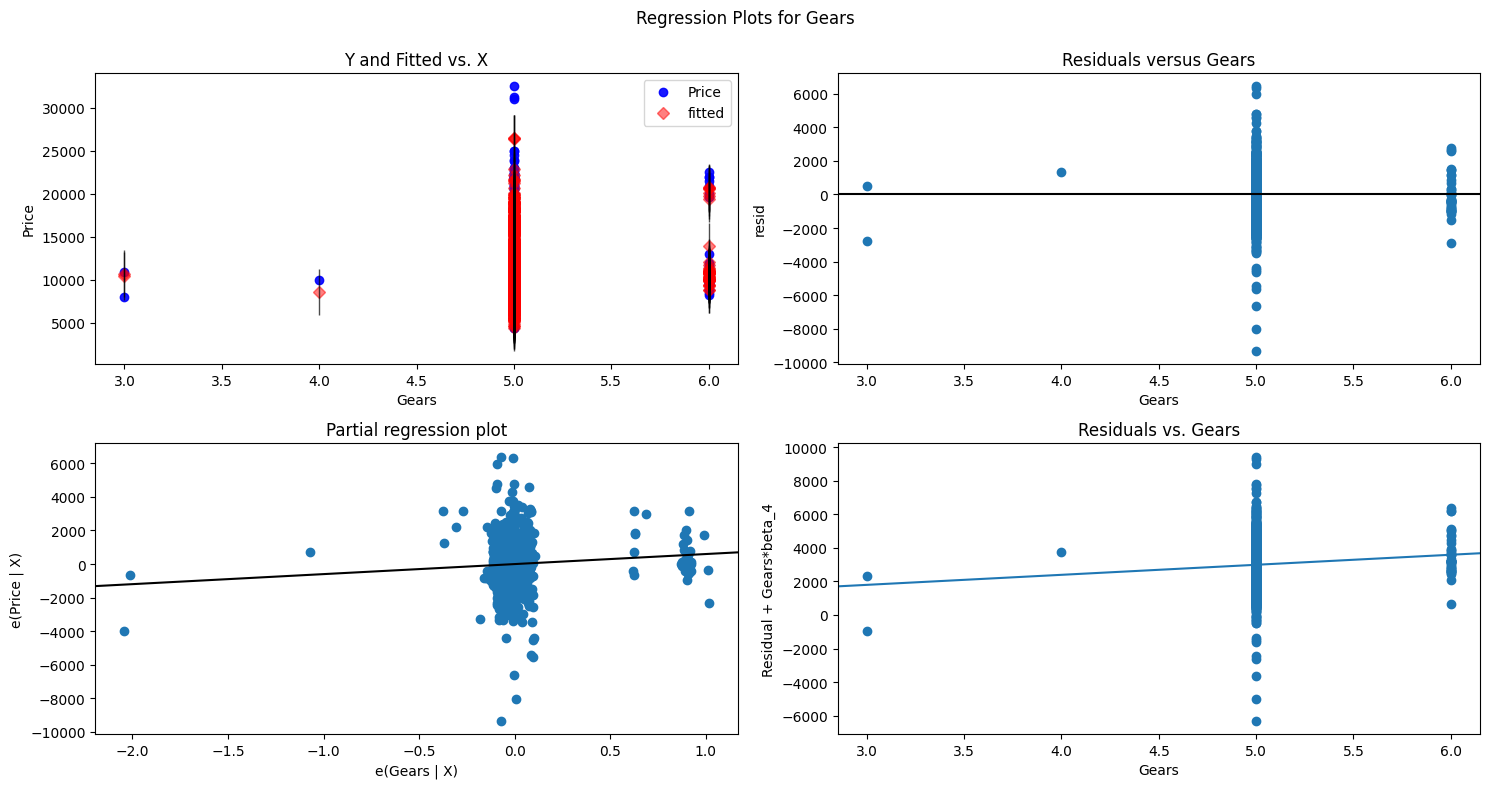

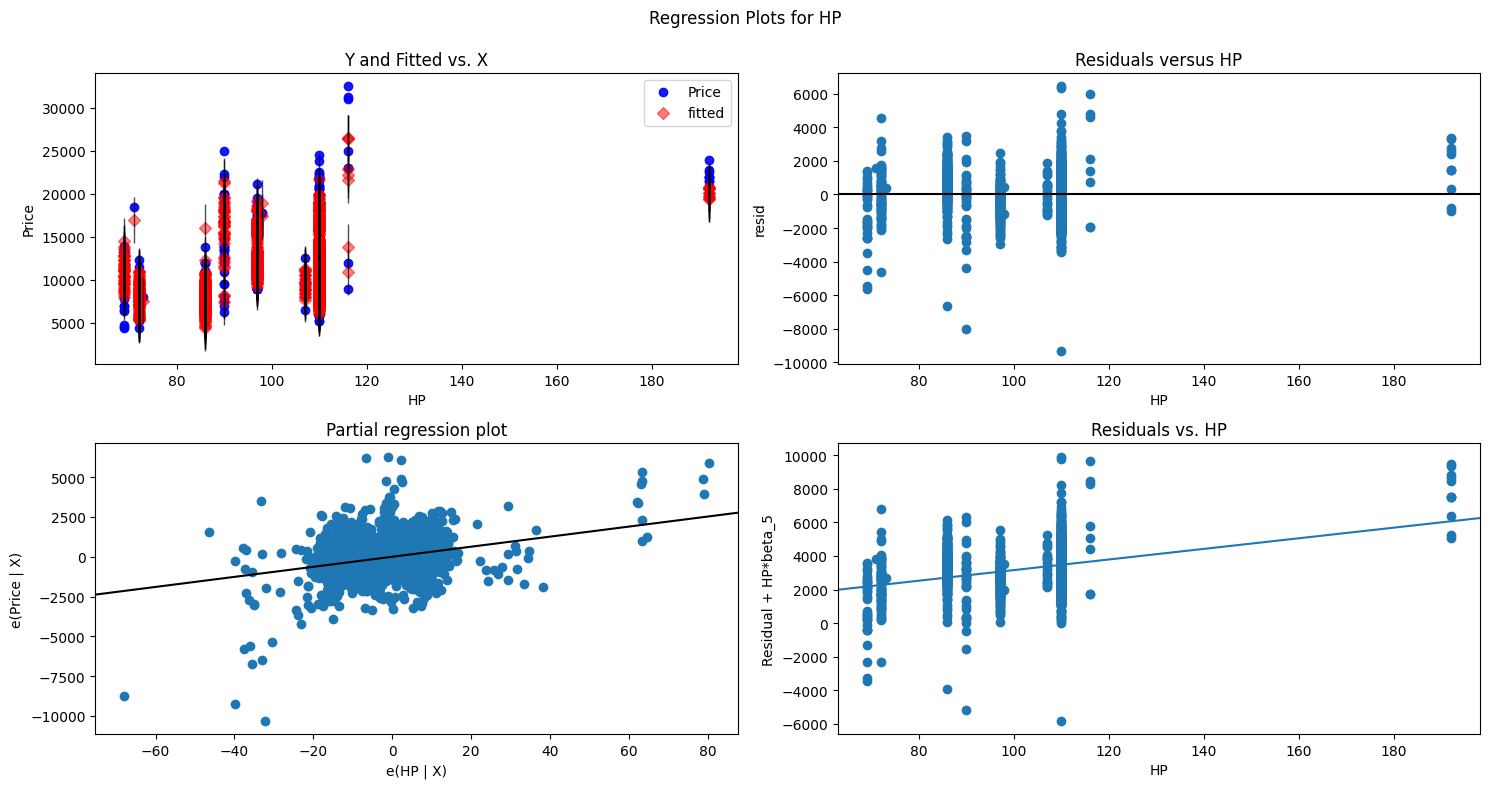

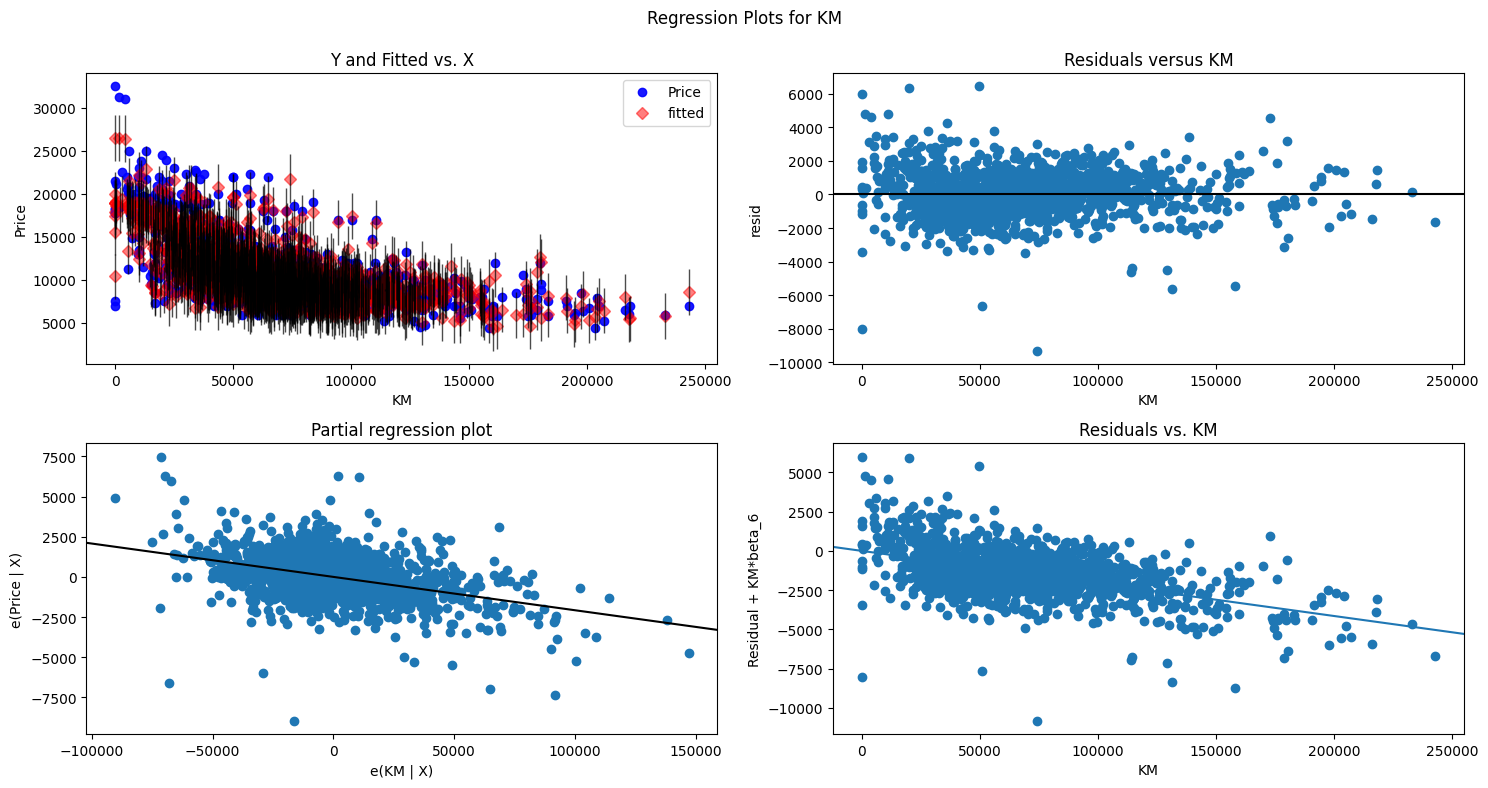

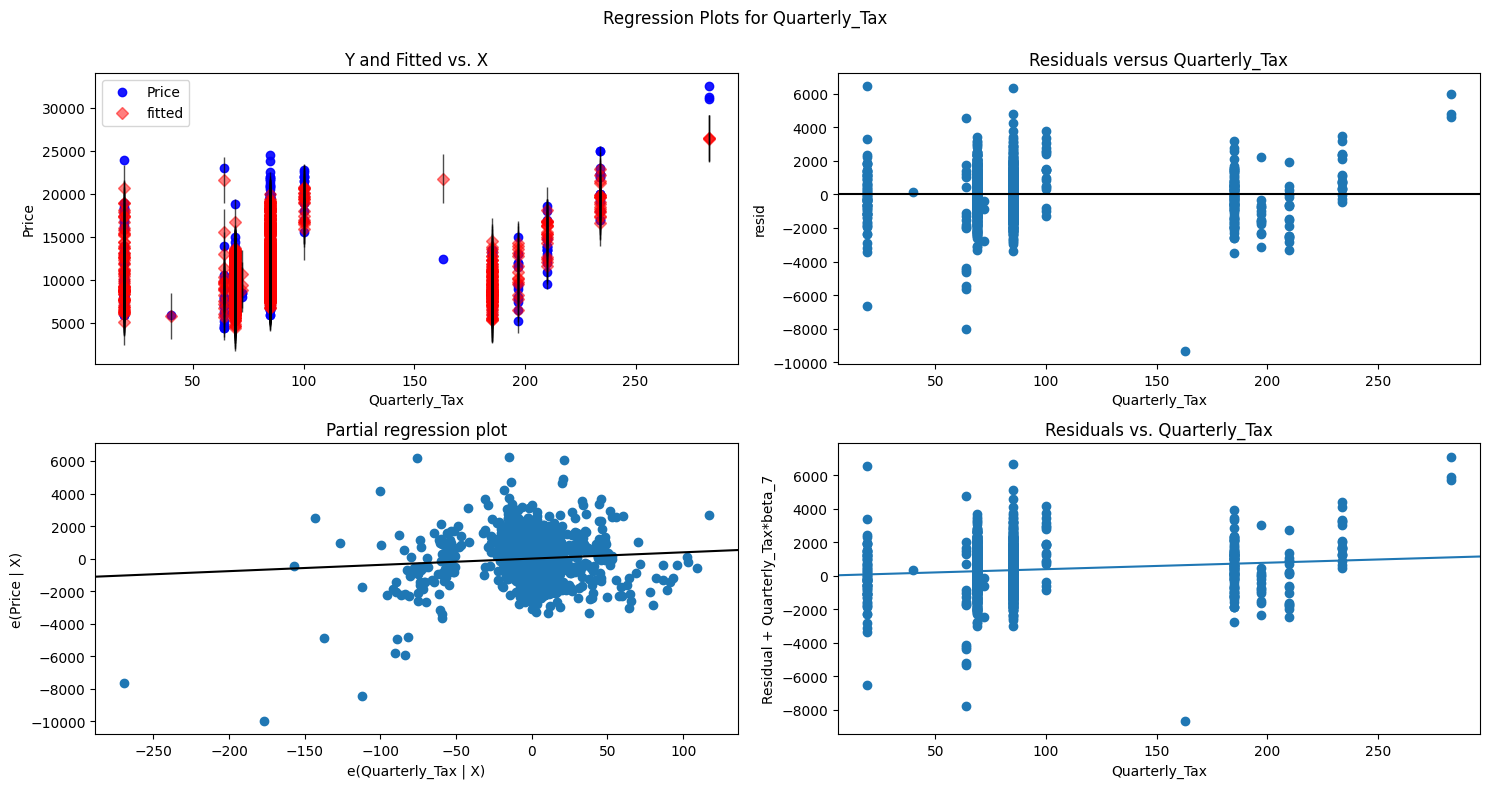

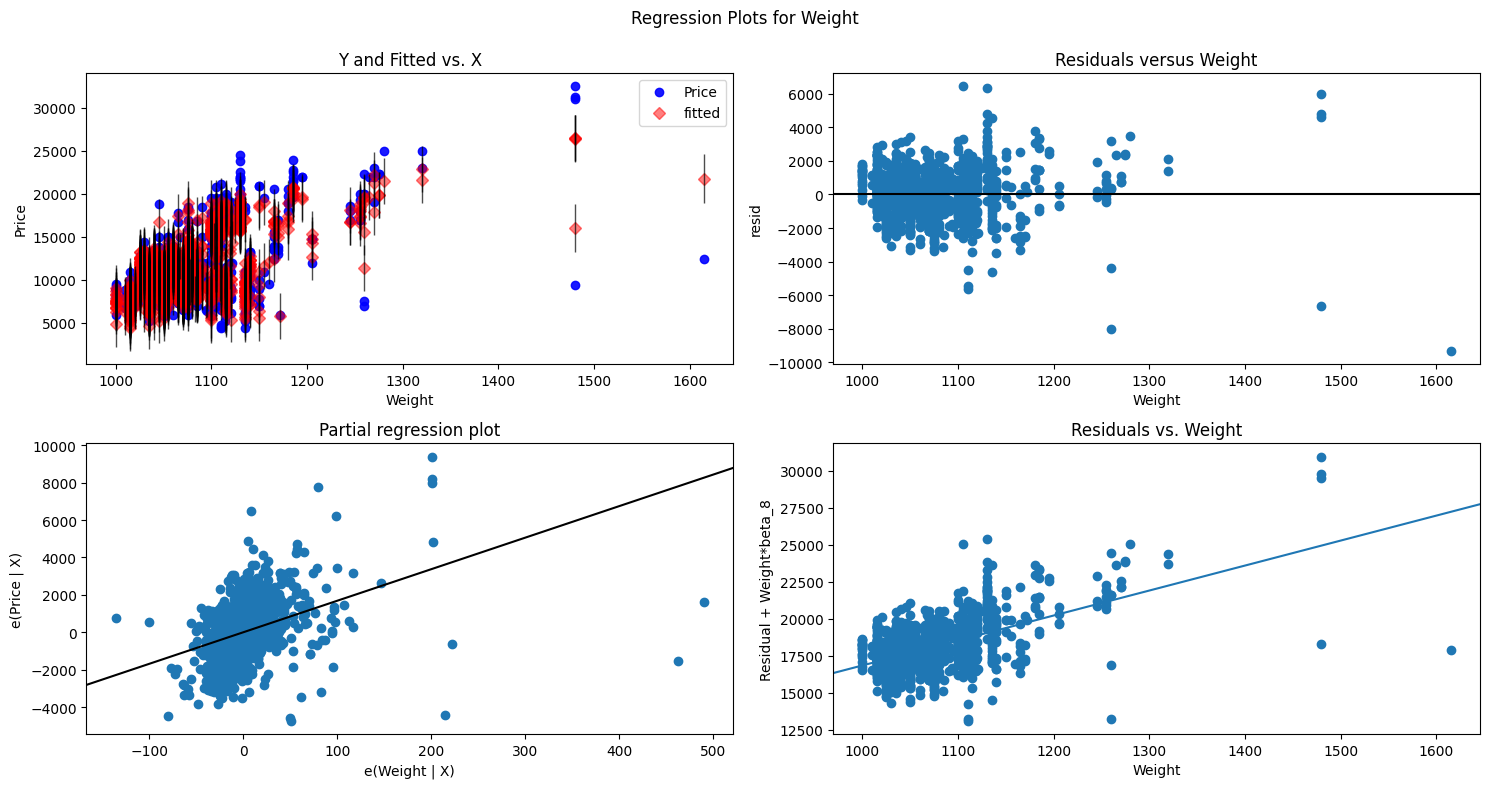

In [285]:
#Residual vs Regressors

fig = plt.figure(figsize=(15, 8))

# Plot for 'Age_08_04'
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.title("Residuals vs. Age_08_04")
plt.show()

# Plot for 'cc'
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.title("Residuals vs. cc")
plt.show()

# Plot for 'Doors'
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.title("Residuals vs. Doors")
plt.show()

# Plot for 'Gears'
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.title("Residuals vs. Gears")
plt.show()

# Plot for 'HP'
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.title("Residuals vs. HP")
plt.show()

# Plot for 'KM'
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.title("Residuals vs. KM")
plt.show()

# Plot for 'Quarterly_Tax'
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.title("Residuals vs. Quarterly_Tax")
plt.show()

# Plot for 'Weight'
fig = plt.figure(figsize=(15, 8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.title("Residuals vs. Weight")
plt.show()


In [286]:
# Model Deletion Diagnostics

#Detecting influencers/outliers

#cooks distance

In [287]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

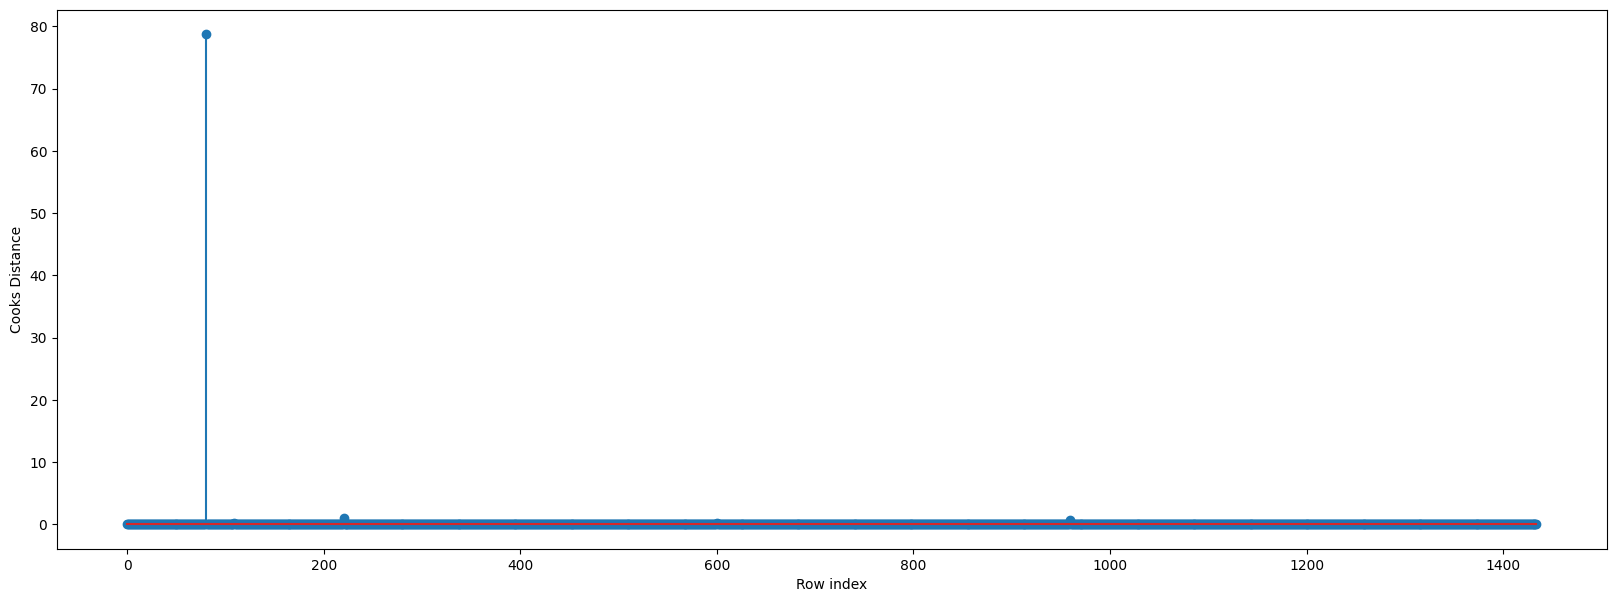

In [288]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [289]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.7295058227903)

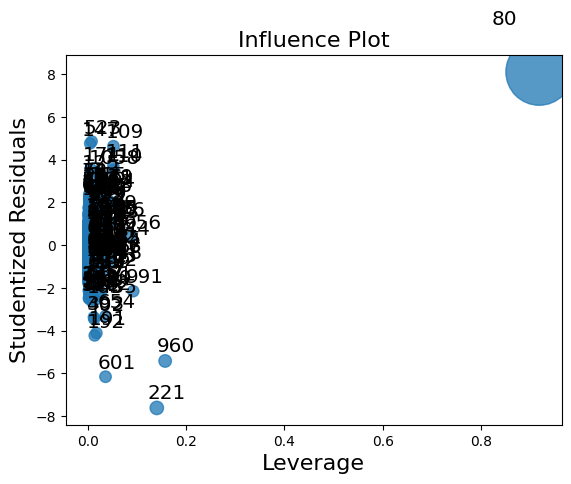

In [290]:
# High influence points

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [291]:
k = X.shape[1]
n = X.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.018815331010452963

In [292]:
#from the above plot,  it is evident that point 80, 220, 600 and 959 are the influencers

In [293]:
tc[tc.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [294]:
tc.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [295]:
#improving the model

In [296]:
#Discard the data points which are influencers and reasign the row number (reset_index())
tc_new=df.drop(df.index[[80]],axis=0).reset_index()
tc_new.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [297]:
tc_new = tc_new.drop(['index'], axis=1)

In [298]:
tc_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [299]:
#build model

In [300]:
#Exclude variable "cc" and generate R-Squared and AIC values
model_no_cc= smf.ols('Price~Age_08_04+Doors+Gears+HP+KM+Quarterly_Tax+Weight',data = tc_new).fit()

In [301]:
model_no_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1272.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:26:45   Log-Likelihood:                -12358.
No. Observations:                1434   AIC:                         2.473e+04
Df Residuals:                    1426   BIC:                         2.478e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5333.8286   1411.325     -3.779      0.000   -8102.325   -2565.332
Age_08_04      -121.7420      2.615    -46.554      0.000    -126.872    -116.612
Doors            -0.3717     39.994     -0.009      0.993     -78.825      78.082
Gears           601.9246    196.996      3.056      0.002     215.492     988.358
HP               31.2658      2.806     11.141      0.000      25.761      36.771
KM               -0.0208      0.001    -16.664      0.000      -0.023      -0.018
Quarterly_Tax     3.6787      1.302      2.826      0.005       1.126       6.232
Weight           16.5815      1.057     15.687      0.000      14.508      18.655
==============================================================================
Omnibus:                      145.074   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              951.571
Skew:                          -0.186   Prob(JB):                    2.34e-207
Kurtosis:                       6.973   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [302]:
#Exclude variable "Doors" and generate R-Squared and AIC values
model_no_doors= smf.ols('Price~Age_08_04+cc+Gears+HP+KM+Quarterly_Tax+Weight',data = tc_new).fit()

In [303]:
model_no_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1340.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:26:45   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1426   BIC:                         2.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6225.7366   1383.114     -4.501      0.000   -8938.893   -3512.581
Age_08_04      -120.5104      2.561    -47.058      0.000    -125.534    -115.487
cc               -2.4918      0.306     -8.135      0.000      -3.093      -1.891
Gears           552.2590    189.176      2.919      0.004     181.166     923.352
HP               39.0416      2.899     13.468      0.000      33.355      44.728
KM               -0.0178      0.001    -13.986      0.000      -0.020      -0.015
Quarterly_Tax     8.9718      1.426      6.293      0.000       6.175      11.768
Weight           19.8642      1.079     18.417      0.000      17.748      21.980
==============================================================================
Omnibus:                      235.248   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2493.347
Skew:                          -0.409   Prob(JB):                         0.00
Kurtosis:                       9.408   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [304]:
# Comparing above R-Square and AIC values, model 'model_no_doors' has high R- square and low AIC value.

In [305]:
#cook's distance

In [306]:
model_influence_no_doors = model_no_doors.get_influence()
(c_no_doors, _) = model_influence_no_doors.cooks_distance

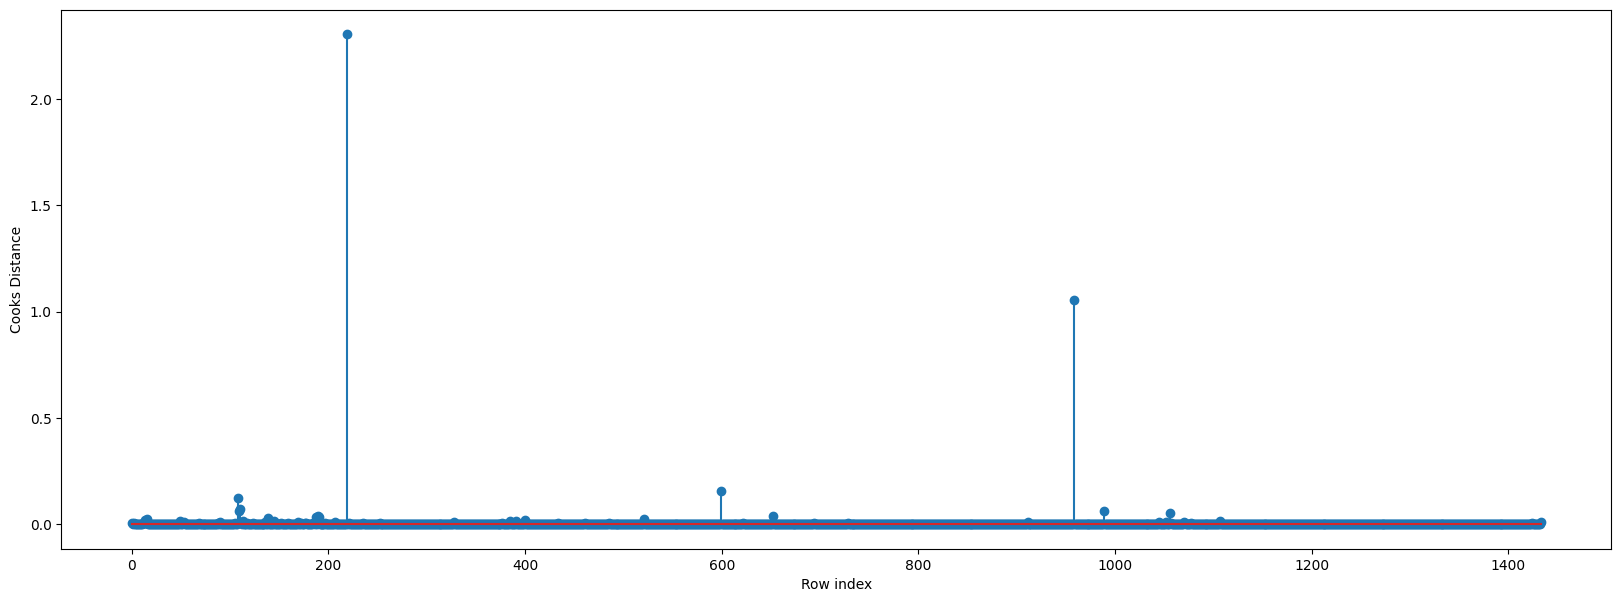

In [307]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_no_doors,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [308]:
#index of the data points where c is more than 1
(np.argmax(c_no_doors),np.max(c_no_doors))

(219, 2.303953482293777)

In [309]:
#Drop 219
tc2=tc_new.drop(tc_new.index[[219]],axis=0)
tc2.shape

(1433, 9)

In [310]:
tc2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [311]:
tc3=tc2.reset_index()

In [312]:
tc4 = tc3.drop(['index'], axis=1)

In [313]:
tc4

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [314]:
#Build the model on the new data
model_no_doors = smf.ols('Price~Age_08_04+cc+Gears+HP+KM+Quarterly_Tax+Weight',data = tc4).fit()

In [315]:
#Again check for influencers
model_influence_no_doors = model_no_doors.get_influence()
(c_no_doors, _) = model_influence_no_doors.cooks_distance

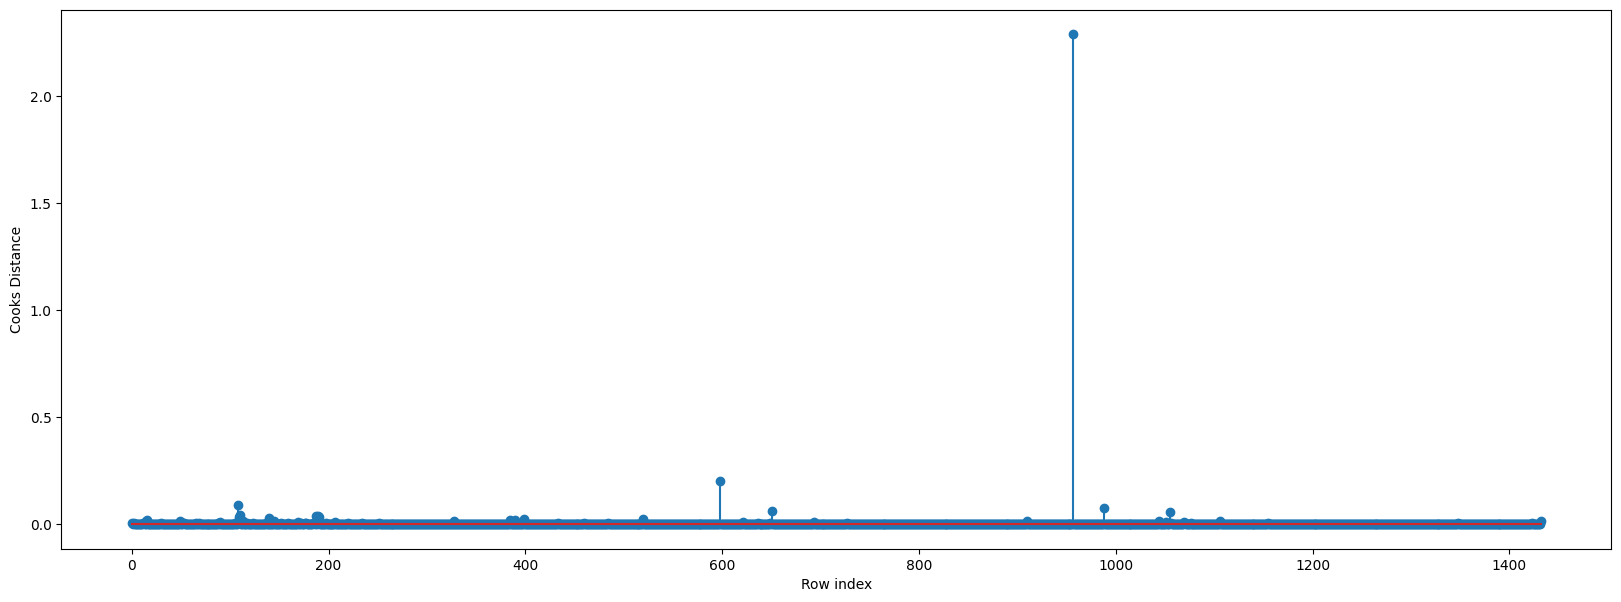

In [316]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tc4)),np.round(c_no_doors,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [317]:
#index of the data points where c is more than 1
(np.argmax(c_no_doors),np.max(c_no_doors))

(957, 2.289048255298973)

In [318]:
tc5=tc4.drop(tc_new.index[[957]],axis=0)
tc5

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [319]:
tc6=tc5.reset_index()

#tc6=tc5.drop(['index'],axis=1)
tc6

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1428,7500,69,20544,86,1300,3,5,69,1025
1428,1429,10845,72,19000,86,1300,3,5,69,1015
1429,1430,8500,71,17016,86,1300,3,5,69,1015
1430,1431,7250,70,16916,86,1300,3,5,69,1015


In [320]:
tc7=tc6.drop(['index'],axis=1)
tc7

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [321]:
#Build the model on the new data
model_no_doors = smf.ols('Price~Age_08_04+cc+Gears+HP+KM+Quarterly_Tax+Weight',data = tc7).fit()

In [322]:
#Again check for influencers
model_influence_no_doors = model_no_doors.get_influence()
(c_no_doors, _) = model_influence_no_doors.cooks_distance

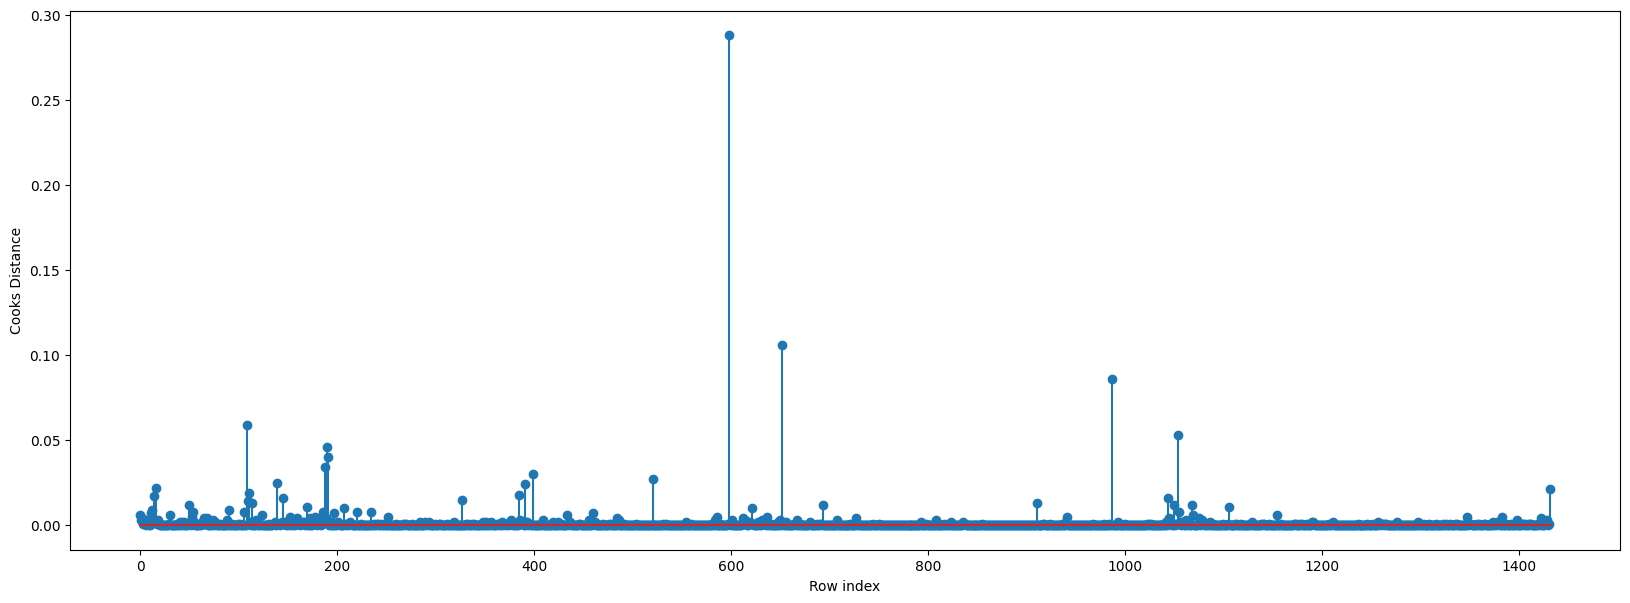

In [323]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tc7)),np.round(c_no_doors,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [324]:
#index of the data points where c is more than 1
(np.argmax(c_no_doors),np.max(c_no_doors))

(598, 0.2878177539452353)

In [325]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [326]:
#Check the accuracy of the model

model_no_doors= smf.ols('Price~Age_08_04+cc+Gears+HP+KM+Quarterly_Tax+Weight',data = tc7).fit()

In [327]:
model_no_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1537.
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:26:47   Log-Likelihood:                -12223.
No. Observations:                1432   AIC:                         2.446e+04
Df Residuals:                    1424   BIC:                         2.450e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.443e+04   1439.114    -10.029      0.000   -1.73e+04   -1.16e+04
Age_08_04      -112.4497      2.486    -45.233      0.000    -117.326    -107.573
cc               -3.6557      0.301    -12.145      0.000      -4.246      -3.065
Gears           580.4961    178.210      3.257      0.001     230.914     930.078
HP               35.8928      2.749     13.058      0.000      30.501      41.285
KM               -0.0172      0.001    -14.300      0.000      -0.020      -0.015
Quarterly_Tax     5.4926      1.374      3.997      0.000       2.797       8.188
Weight           29.2226      1.232     23.721      0.000      26.806      31.639
==============================================================================
Omnibus:                      109.591   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.369
Skew:                          -0.056   Prob(JB):                    3.80e-124
Kurtosis:                       6.084   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [328]:
#Predicting for new data

In [353]:
#New data for prediction
new_data=pd.DataFrame({"Age_08_04":24,'KM':45000,'HP':100,"cc":2000,'Gears':5, 'Quarterly_Tax':200, "Weight":1135},index=[1])

In [354]:
model_no_doors.predict(new_data)

1    15541.582465
dtype: float64

In [355]:
model_no_doors.predict(tc_new.iloc[0:5,])

0    16192.554974
1    15746.258459
2    16170.822941
3    15837.767454
4    15697.459551
dtype: float64

In [356]:
pred_y = model_no_doors.predict(tc_new)

In [357]:
pred_y

0       16192.554974
1       15746.258459
2       16170.822941
3       15837.767454
4       15697.459551
            ...     
1429     9024.411979
1430     8421.389876
1431     8567.959734
1432     8682.129197
1433    10681.447575
Length: 1434, dtype: float64

In [358]:
tc_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015
